In [ ]:
import matplotlib.pyplot as plt
from netgraph import Graph
import networkx as nx
from random import randint
import pandas as pd
import numpy as np
from community import community_louvain

In [ ]:
G = nx.Graph()
X = []
Y = []
f = open("../edgeList.txt", "r")

for line in f.readlines():
	a, b = map(int, line[:-1].split())
	G.add_edge(a, b)
	X.append(a)
	Y.append(b)

partition = community_louvain.best_partition(G)

In [ ]:
nx.draw(G)

In [ ]:
pos = nx.spring_layout(G)
X = []
Y = []
for x in pos:
	X.append(pos[x][0])
	Y.append(pos[x][1])

In [ ]:
G_fb = nx.read_edgelist("../edgeList.txt", create_using= nx.Graph(), nodetype = int)

In [ ]:
print("no of edges =", G_fb.number_of_edges(), "and no of vertices =", G_fb.number_of_nodes())

In [ ]:
X = []
Y = []

with open("../edgeList.txt") as file:
	for line in file:
		# l = line.rstrip()
		x, y = [int(num) for num in line[:-1].split(' ')]
		X.append(x)
		Y.append(y)

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(X, Y, marker='.')
plt.show()

In [82]:
df = pd.read_csv("community.csv")
df_stats = pd.read_csv("community_stats.csv")
df_stats = df_stats.sort_values(by=["population"])
# top_20 = df_stats["community"].to_list()[:20]
bottom_20 = df_stats["community"].to_list()[-20:]
df = df.loc[df["community"].isin(bottom_20)]

In [83]:
print(bottom_20)

[42, 6, 38, 2, 0, 54, 19, 15, 34, 7, 10, 39, 17, 20, 11, 18, 14, 5, 63, 25]


In [84]:
df = df.sort_values(by=["community"])

In [85]:
print(set(df["community"].to_list()))

{0, 2, 5, 6, 7, 10, 11, 14, 15, 17, 18, 19, 20, 25, 34, 38, 39, 42, 54, 63}


In [86]:
priority = df["author"].to_list()

In [87]:
graph20 = nx.Graph()
G = nx.Graph()
# with open("../edgeList.txt") as file:
# 	for line in file:
# 		# l = line.rstrip()
# 		x, y = [int(num) for num in line[:-1].split(' ')]
# 		X.append(x)
# 		Y.append(y)

# G = nx.Graph()
f = open("../edgeList.txt", "r")
X20 = []
Y20 = []
for line in f.readlines():
	a, b = map(int, line[:-1].split())
	G.add_edge(a, b)
	if a in priority and b in priority:
		graph20.add_edge(a, b)
		X20.append(a)
		Y20.append(b)
f.close()
partition = community_louvain.best_partition(G)

In [88]:
tmp_val = [partition.get(node) for node in graph20.nodes()]
mp = {}
values = []
count = 0
for i in tmp_val:
	if i not in mp:
		mp[i] = count
		count += 1
	values.append(mp[i])
print("values done")
# pos = nx.spring_layout(G)
pos = {}
f = open("position.csv", "r")
for line in f.readlines():
	line = line[:-1].split(",")
	pos[int(line[0])] = list(map(float, line[1:]))
f.close()

values done


In [89]:
# print(pos)

In [90]:
# # pos = nx.spring_layout(G)
# X20 = []
# Y20 = []
# for x in pos:
# 	X20.append(pos[x][0])
# 	Y20.append(pos[x][1])

In [91]:
m = {}
i = 0
for num in priority:
	if num not in m:
		m[num] = i
		i += 1

for num in X20:
	if num not in m:
		m[num] = i
		i += 1

for num in Y20:
	if num not in m:
		m[num] = i
		i += 1

In [92]:
# print(m)
print(i, len(X20),len(Y20))

4386 19515 19515


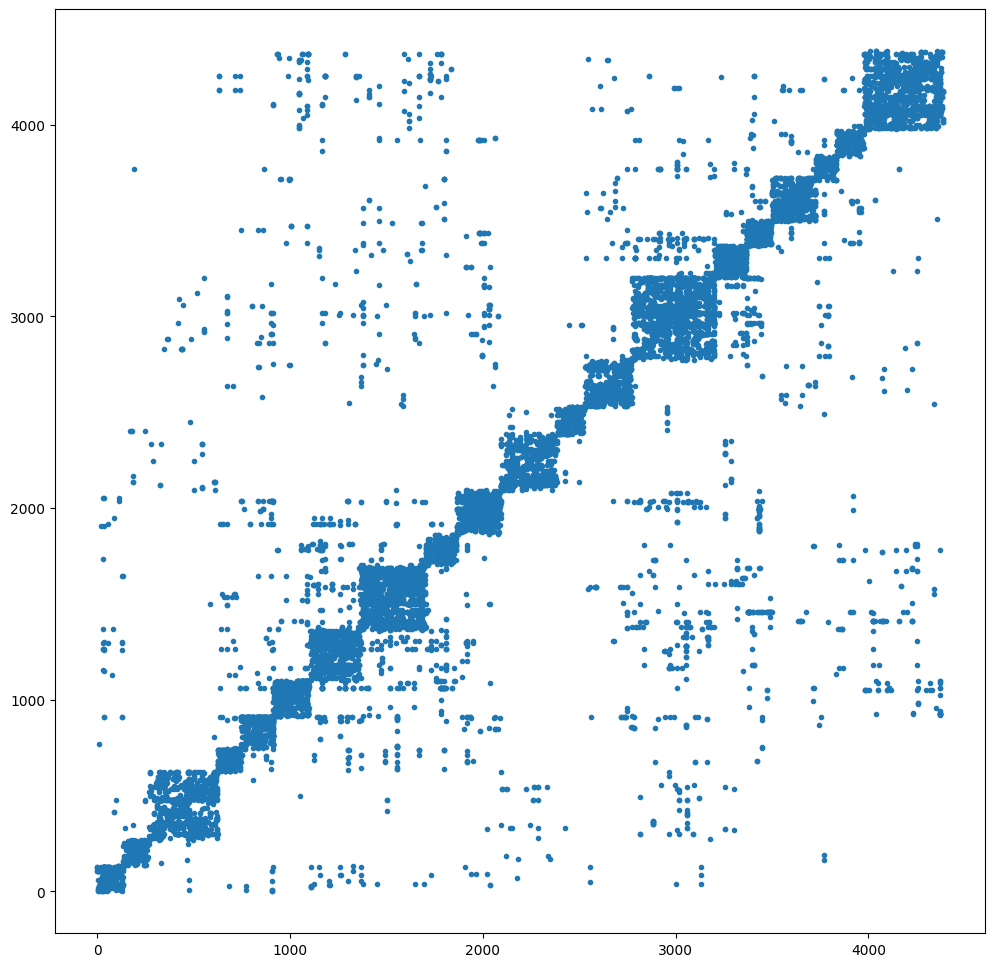

In [93]:
XX = [m[val] for val in X20]
YY = [m[val] for val in Y20]

plt.figure(figsize=(12, 12))
plt.scatter(XX, YY, marker='.')
plt.show()

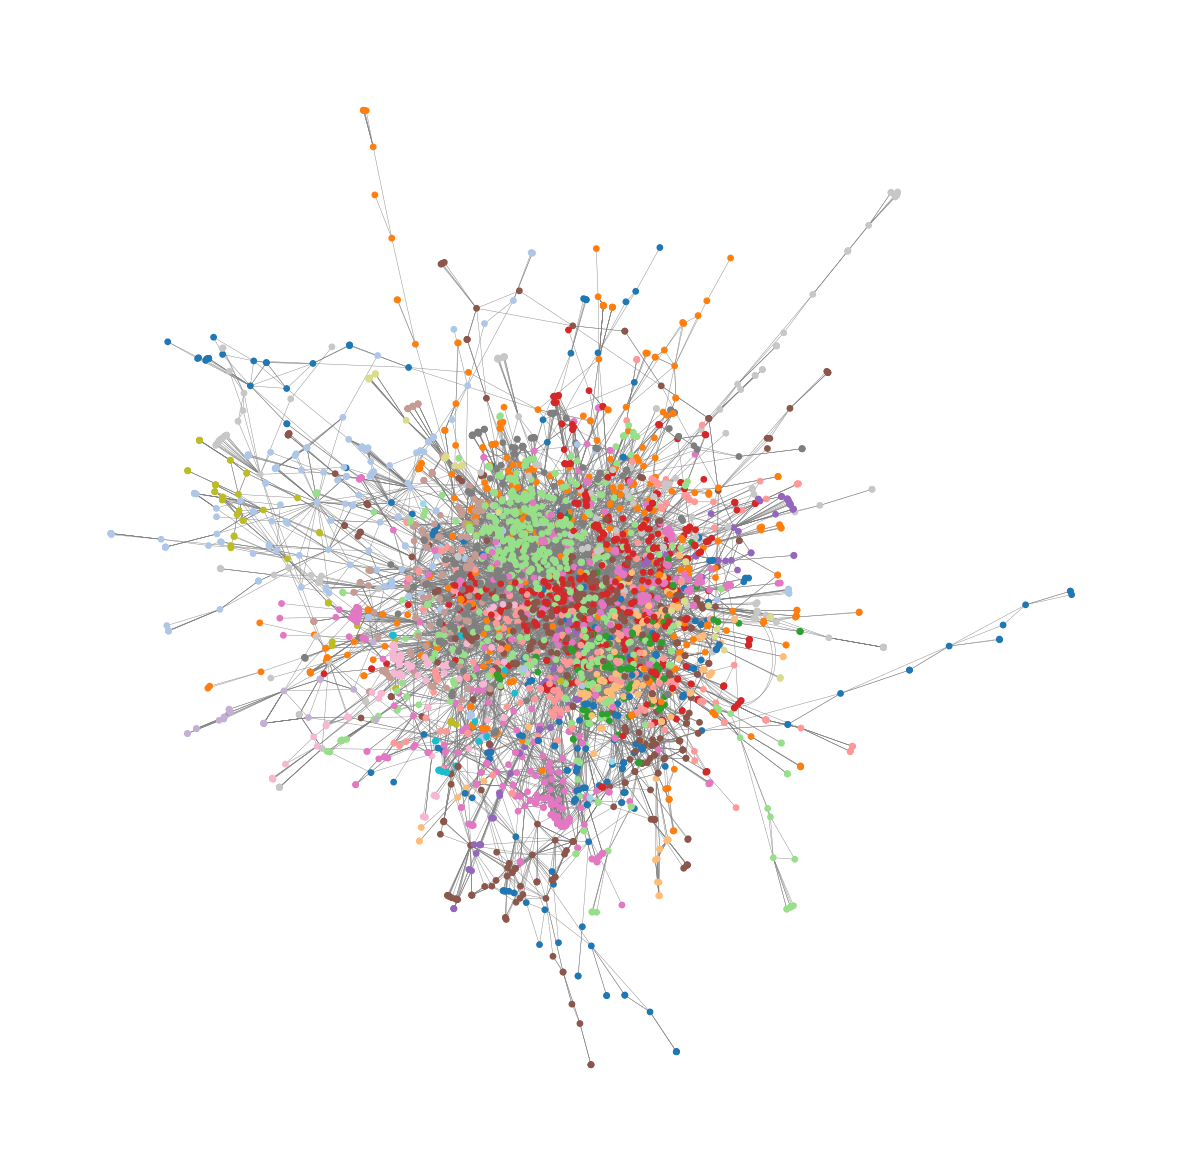

In [109]:
plt.axis("off")
size = 15
plt.rcParams['figure.figsize'] = [size, size]
nx.draw_networkx(graph20, pos = pos, cmap = plt.get_cmap('tab20'), node_color = values, node_size = size, width = 0.3, edge_color = 'grey', with_labels = False)

In [81]:
# print(values)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 4, 6, 6, 6, 0, 0, 7, 8, 9, 8, 8, 8, 0, 0, 0, 0, 0, 10, 5, 5, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 5, 5, 5, 5, 11, 11, 11, 11, 11, 11, 11, 11, 0, 0, 0, 9, 9, 1, 1, 6, 6, 12, 12, 2, 2, 1, 2, 2, 2, 1, 1, 5, 5, 5, 7, 1, 1, 1, 1, 0, 0, 0, 0, 0, 6, 11, 10, 0, 0, 11, 11, 11, 11, 12, 3, 3, 9, 9, 10, 10, 10, 13, 13, 14, 14, 4, 4, 2, 2, 2, 10, 10, 9, 9, 9, 10, 9, 14, 5, 11, 5, 14, 9, 9, 9, 9, 9, 9, 9, 0, 0, 5, 5, 5, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 15, 11, 15, 15, 15, 15, 3, 0, 0, 0, 16, 2, 2, 5, 6, 14, 14, 14, 14, 1, 1, 8, 8, 8, 13, 13, 13, 13, 9, 11, 4, 4, 4, 11, 11, 11, 1, 17, 17, 17, 17, 9, 9, 9, 9, 9, 9, 9, 1, 1, 2, 0, 17, 0, 0, 0, 18, 18, 18, 11, 11, 7, 8, 8, 8, 8, 8, 14, 4, 4, 4, 1, 17, 17, 17, 1, 1, 5, 5, 5, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 5, 5, 5, 5, 5, 5, 10, 1, 1, 1, 5, 9, 9, 9, 9, 9, 9, 5, 5, 11, 11, 11, 11, 0, 0, 11, 11, 14, 14, 9, 9, 9, 9, 9, 10, 10, 10, 10, 5, 5, 1, 1, 14, 14, 14, 1, 7, 1, 14,

In [ ]:

node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()